# Topics in ML: Assignment 1
### (The script takes long time to run (15-20mins) check output and then run again if needed.)

In [1]:
from GridWorld import GridWorld
from ValueIteration import ValueIteration
from PolicyIteration import PolicyIteration
from ConfusedAgent import ConfusedAgent
import matplotlib.pyplot as plt
from matplotlib import cm
import math
import numpy as np
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [2]:
env = GridWorld()
agents = [ValueIteration(env), PolicyIteration(env), ConfusedAgent(env)]

In [3]:
N = 10
ub = [[],[],[]]
lb = [[],[],[]]
mean = [[],[],[]]

for i in range(75):
    for j in range(len(agents)):
        for k in range(N):
            state = env.reset()
            G = 0
            discount_factor = 1
            steps = 0
            while steps < 300:
                next_state, reward, done = env.step(agents[j].get_action(state))
                G += discount_factor*reward
                discount_factor = 0.99*discount_factor
                if done:
                    break
                state = next_state
                steps+=1
            if len(ub[j]) == i:
                ub[j].append(G)
                lb[j].append(G)
                mean[j].append(G)
            else:
                ub[j][i] = max(ub[j][i], G)
                lb[j][i] = min(lb[j][i], G)
                mean[j][i] = mean[j][i] + (G - mean[j][i])/(k+1)
        
        agents[j].update()

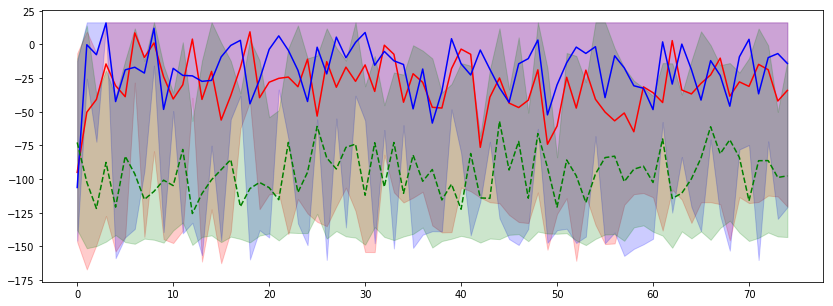

In [4]:
def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    plt.fill_between(range(len(mean)), ub, lb,
                     color=color_shading, alpha=.2)
    # plot the mean on top
    plt.plot(mean, color_mean)
    
# plot the data
fig = plt.figure(1, figsize=(14, 5))
plot_mean_and_CI(mean[0], ub[0], lb[0], color_mean='r', color_shading='r')
plot_mean_and_CI(mean[1], ub[1], lb[1], color_mean='b', color_shading='b')
plot_mean_and_CI(mean[2], ub[2], lb[2], color_mean='g--', color_shading='g')

In [5]:
# Policy iteration

PIA = PolicyIteration(env, 0)
is_stable = False
while not is_stable:
    is_stable = PIA.update()
print(PIA.get_policy().reshape(8,8))

PIA = PolicyIteration(env, 0.1)
is_stable = False
while not is_stable:
    is_stable = PIA.update()
print(PIA.get_policy().reshape(8,8))

PIA = PolicyIteration(env, 0.5)
is_stable = False
while not is_stable:
    is_stable = PIA.update()
print(PIA.get_policy().reshape(8,8))

PIA = PolicyIteration(env, 0.75)
is_stable = False
while not is_stable:
    is_stable = PIA.update()
print(PIA.get_policy().reshape(8,8))

# Didn't converge so commented out
# PIA = PolicyIteration(env, 1)
# is_stable = False
# while not is_stable:
#     is_stable = PIA.update()
# PIA.get_policy().reshape(8,8)

[[1 3 3 3 3 1 1 3]
 [1 0 0 1 0 3 0 0]
 [1 0 3 0 0 3 0 0]
 [2 0 0 0 0 0 0 0]
 [1 3 0 0 1 0 0 0]
 [0 0 3 3 1 0 0 0]
 [1 0 0 3 1 0 0 2]
 [0 0 0 3 0 0 1 0]]
[[2 3 3 3 3 1 2 3]
 [2 2 1 2 2 1 0 3]
 [2 2 3 1 3 3 0 3]
 [2 3 0 0 1 3 0 3]
 [2 3 3 1 1 2 2 3]
 [0 0 3 3 1 1 2 2]
 [0 0 3 3 1 1 2 2]
 [0 0 0 3 1 1 1 0]]
[[2 2 3 2 3 1 2 3]
 [2 2 2 2 2 1 0 0]
 [2 2 3 1 3 1 0 0]
 [2 3 3 0 1 1 0 3]
 [2 3 3 1 1 2 2 2]
 [0 0 3 3 1 2 2 2]
 [0 0 3 3 1 1 2 2]
 [0 0 0 1 1 1 1 0]]
[[2 2 3 2 2 1 1 3]
 [2 2 2 2 2 1 0 0]
 [2 2 3 3 1 1 0 0]
 [2 3 3 3 1 1 0 0]
 [2 3 3 1 1 2 2 2]
 [0 0 3 3 1 2 2 2]
 [0 0 3 1 1 1 2 2]
 [0 0 0 1 1 1 1 0]]


------------------------------------------------------------------
PIA - Analysis
------------------------------------------------------------------

## discount factor = 0
- The agent is short sighted.
- Agent concentrates on avoiding walls and not going of the grid i.e. invalid moves at most places.
- If end state can be reached in one move only in those states it optimizes on reaching end state.

## discount factor = 0.1
- The agent is a bit sighted.
- It tries to optimize on reaching end states.
- Agent concentrates on avoiding walls and not going of the grid i.e. invalid moves, at most places if all end states are 4 or more steps away or have a high chance of making invalid move.

## discount factor = 0.5
- The agent is a bit sighted.
- Agent concentrates on reaching end states.
- It also concentrates on avoiding walls and not going of the grid i.e. invalid moves, at most places if moving towards end states has a high chance of making invalid moves.

## discount factor = 0.75
- The agent is a bit sighted.
- Agent concentrates on reaching end states.
- Agent concentrates on reaching end states which are closest and have least walls close to them.

## discount factor = 1
- Didn't converge

In [6]:
# Value iteration

VIA = ValueIteration(env, 0)
is_stable = False
while not is_stable:
    _, is_stable = VIA.update()
print(VIA.get_policy().reshape(8,8))

VIA = ValueIteration(env, 0.1)
is_stable = False
while not is_stable:
    _, is_stable = VIA.update()
print(VIA.get_policy().reshape(8,8))

VIA = ValueIteration(env, 0.5)
is_stable = False
while not is_stable:
    _, is_stable = VIA.update()
print(VIA.get_policy().reshape(8,8))

VIA = ValueIteration(env, 0.75)
is_stable = False
while not is_stable:
    _, is_stable = VIA.update()
print(VIA.get_policy().reshape(8,8))

# Didn't converge so specified iterations
VIA = ValueIteration(env, 1)
for i in range(75):
    VIA.update()
print(VIA.get_policy().reshape(8,8))

[[1 3 3 3 3 1 1 3]
 [1 0 0 1 0 3 0 0]
 [1 0 3 0 0 3 0 0]
 [2 0 0 0 0 0 0 0]
 [1 3 0 0 1 0 0 0]
 [0 0 3 3 1 0 0 0]
 [1 0 0 3 1 0 0 2]
 [0 0 0 3 0 0 1 0]]
[[2 3 3 3 3 1 1 3]
 [2 2 2 2 3 1 0 0]
 [2 3 3 3 3 3 0 0]
 [2 3 3 0 1 1 0 3]
 [2 3 3 0 1 2 2 2]
 [0 0 3 3 1 2 2 2]
 [0 0 3 3 1 1 2 2]
 [0 0 0 3 1 1 1 0]]
[[2 3 3 3 2 1 2 3]
 [2 3 2 2 2 1 0 0]
 [2 3 3 3 1 1 0 0]
 [2 3 3 3 1 1 0 0]
 [1 3 3 0 1 1 2 2]
 [0 0 3 3 1 1 2 2]
 [0 0 0 3 1 1 2 2]
 [0 0 0 1 1 1 1 0]]
[[2 2 3 2 2 1 2 3]
 [2 3 3 2 2 1 0 0]
 [2 3 3 3 1 1 0 0]
 [2 3 3 3 3 1 0 0]
 [1 3 3 0 1 1 2 2]
 [0 0 3 3 1 1 2 2]
 [0 0 0 3 1 1 2 2]
 [0 0 0 1 1 1 1 0]]
[[2 2 3 2 2 3 2 3]
 [2 3 3 2 3 3 2 3]
 [2 3 3 3 3 3 3 3]
 [2 3 3 3 3 3 3 3]
 [1 3 3 0 0 0 0 0]
 [0 0 3 3 0 0 0 3]
 [0 0 0 3 0 0 0 2]
 [0 0 0 3 0 0 1 0]]


------------------------------------------------------------------
VIA - Analysis
------------------------------------------------------------------
## discount factor = 0
- The agent is short sighted.
- Agent concentrates on avoiding walls and not going of the grid i.e. invalid moves at most places.
- If end state can be reached in one move only in those states it optimizes on reaching end state.

## discount factor = 0.1
- The agent is a less short sighted.
- It tries to optimize on reaching end states. (lesser than in policy iteration.)
- Agent concentrates on avoiding walls and not going of the grid i.e. invalid moves, at most places.

## discount factor = 0.5
- The agent is a bit sighted.
- Agent tries to optimize on reaching end states.
- Agent concentrates on avoiding walls and not going of the grid i.e. invalid moves, at most places if all end states are 4 or more steps away or have a high chance of making invalid move.

## discount factor = 0.75
- The agent is a bit sighted.
- Agent concentrates on reaching end states.
- Agent concentrates on reaching end states which are closest and have least walls close to them.

## discount factor = 1
- Didn't converge so fixed number of iterations to 75
- Only concentrates on getting to goal. 
- Nearly no consideration given to path which would be taken. (like in 1, 0 the nearest goal was one step away by taking step 0 but instead the policy guides to a farther away end state.

----------------------------------------------------------------
 Jack's Car Rental
----------------------------------------------------------------
(Assuming people can't rent or return more than 10 cars at any location) 

## Symbols
- $M = 10$
- $\lambda1 = Mean value of renting car at location 1$
- $\lambda2 = Mean value of renting car at location 2$
- $\lambda3 = Mean value of returning car at location 1$
- $\lambda4 = Mean value of returning car at location 1$
- $location1 = number of cars at location 1$
- $location2 = number of cars at location 2$

## States (s)
- The tuple of number of cars in location 1 and location 2 represents the states.
- Each location can have minimum 0 and maximum 20 cars. That is each location has 21 states.
- Number of possible states: 441 (21 x 21)

## Actions (a)
- Cars moved over night can be at maximum be 5.
- Therefore a maximum of 5 cars can be moved to location 1 and 5 cars can be moved from location 1 to location 2.
- If we consider actiond to be number of cars moved from location 1 then the actions will be -5 to 5.
- Total number of available actions: 2 x 5 + 1 = 12 

## Reward (r(s, a))
- We get a positive reward for the total number of cars we are able to rent. (cost of rent =10)
- We get a negative reward for the number of cars we move. (cost of moving = -2)
- Number of cars rented at any location = min(Cars at location after moving, Rent requests).
- Positive reward = (cost of rent) \* (total number of cars rented at location 1 and 2)
- Negative reward = (cost of moving) \* (number of cars moved i.e. absolute_value(action))
- r(s, a) =  10\*(average of total cars that actually got rented)  - 2\*(cars moved)
- Average of total cars that actually got rented = $$\sum_{i=0}^M \sum_{j=0}^M P(i|\lambda1)*P(j|\lambda2)*[min(location1 - action, i) + min(location2 + action, j)$$

## Transition (P(s'|s,a))
- Location 1:
    - Let probability of i cars rented = $rent1_i$
    - Let probability of i cars returned = $ret1_i$
- Location 2:
    - Let probability of i cars rented = $rent2_i$
    - Let probability of i cars returned = $ret2_i$
- For location 1: location1 - action - location1' = $rent1$ - $ret1$ = x
- For location 2: location2 - action - location2' = $rent2$ - $ret2$ = y
- P(s'|s,a) = $\sum_{\substack{rent1}} \sum_{\substack{rent2}} P(rent1_i|\lambda1)*P(rent2_i|\lambda2)*P(x - Min(rent1_i, location1 - action)|\lambda3)*P(y - Min(rent2_i, location2 + action)|\lambda4)$

## Bellman Equation
- Policy evaluation equation = $\sum_{\substack{action}}\pi(action|state)[r(state, action) + \gamma\sum_{\substack{state'}}P(state'|state, action)*V(state')]$
- Policy improvement equation = $maxarg_{\substack{action}}r(state, action) + \gamma\sum_{\substack{state'}}P(state'|state, action)*V(state')$

In [7]:
class JCR():
    def __init__(self, discount_factor=0.9, theta=1):
        self.discount_factor = discount_factor
        self.theta = theta
        self.max_cars = 20
        self.move_cars = 5
        self.move_cost = -2
        self.rent_reward = 10
        self.loc1_rent_m = 3 
        self.loc1_ret_m = 4 
        self.loc2_rent_m = 3 
        self.loc2_ret_m = 2
        self.valueFunction = np.zeros((self.max_cars + 1, self.max_cars + 1))
        self.policy = np.zeros((self.max_cars + 1, self.max_cars + 1))
        self.actions = np.arange(-5, 6)
        self.i = 0
        
    def poisson(self, n, u):
        return math.exp(-u) * math.pow(u, n) / math.factorial(n)
    
    def policy_iteration(self):
        is_stable = False
        while not is_stable:
            self.visualize()
            self.valueFunction = self.policy_evaluation(self.policy)
            is_stable = self.policy_update()
        self.visualize()
        self.visual_3d()
        
    def policy_update(self):
        is_stable = True
        for i in range(self.max_cars + 1):
            for j in range(self.max_cars + 1):
                max_v = -99999
                max_a = -1
                for a in range(-self.move_cars, self.move_cars+1):
                    if ((a >= 0 and i >= a) or (a < 0 and j >= abs(a))) == False:
                        pass
                    reward = self.bellman(i, j, a, self.valueFunction)
                    if reward > max_v:
                        max_v = reward
                        max_a = a
                if max_a != self.policy[i][j]:
                    is_stable = False
                self.policy[i][j] = max_a
        
        return is_stable
        
    def policy_evaluation(self, policy):
        V = self.valueFunction
        while True:
            delta = 0
            for i in range(self.max_cars + 1):
                for j in range(self.max_cars + 1):
                    a = policy[i][j]
                    v = self.bellman(i, j, a, V)
                    delta = max(delta, abs(V[i][j] - v))
                    V[i][j] = v
            if delta < self.theta:
                break
        return V
    
    def bellman(self, s1, s2, a, V):
        cars_loc1 = int(min(s1 - a, self.max_cars))
        cars_loc2 = int(min(s2 + a, self.max_cars))
        
        reward = self.move_cost * abs(a)
        
        for rent1 in range(11):
            prob_rent1 = self.poisson(rent1, self.loc1_rent_m)
            act_rent1 = min(rent1, cars_loc1)
            cars_left_loc1 = cars_loc1 - act_rent1
            
            for rent2 in range(11):
                rent_prob = prob_rent1 * self.poisson(rent2, self.loc2_rent_m)
                act_rent2 = min(rent2, cars_loc2)
                cars_left_loc2 = cars_loc2 - act_rent2
                
                rew = self.rent_reward * (act_rent1 + act_rent2)
                
                for ret1 in range(11):
                    prob_ret1 = self.poisson(ret1, self.loc1_ret_m) * rent_prob
                    tot_cars_loc1 = min(cars_left_loc1 + ret1, self.max_cars)
                    
                    for ret2 in range(11):
                        tot_cars_loc2 = min(cars_left_loc2 + ret2, self.max_cars)
                        tot_prob = self.poisson(ret2, self.loc2_ret_m) * prob_ret1
                        reward += tot_prob * (rew + self.discount_factor*V[tot_cars_loc1][tot_cars_loc2])
        return reward
    
    def visualize(self):
        ax = plt.gca()
        fig = plt.gcf()
        im = ax.imshow(self.policy, interpolation='none', vmin=-5, vmax=5)
        ax.invert_yaxis()
        ax.set_title('Policy')
        ax.set_xlabel('Location 1')
        ax.set_ylabel('Location 2')

        fig.colorbar(im, ax=[ax], shrink=0.45)
        plt.show()
        
    def visual_3d(self):
        V = self.valueFunction

        fig = plt.figure()
        ax = Axes3D(fig)
        X = np.arange(0, V.shape[0], 1)
        Y = np.arange(0, V.shape[1], 1)
        X, Y = np.meshgrid(X, Y)
        surf = ax.plot_surface(X, Y, V, rstride=1, cstride=1, cmap=cm.coolwarm,
                               linewidth=0, antialiased=False)
        ax.set_xlabel('Location 1')
        ax.set_ylabel('Location 2')
        plt.show()

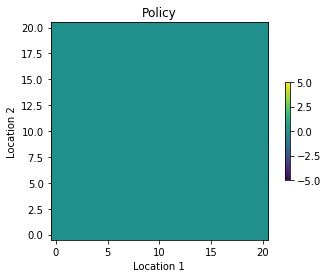

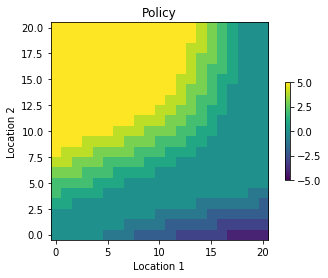

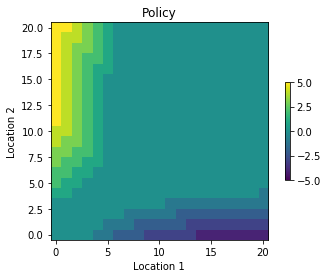

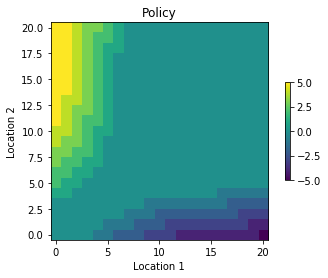

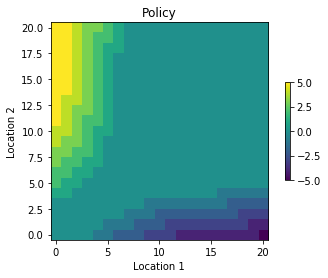

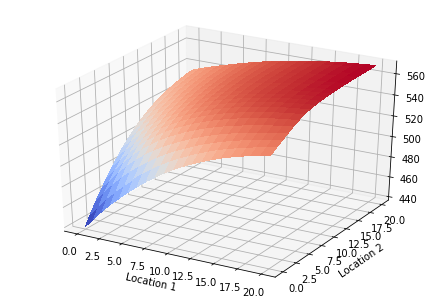

In [8]:
jcr = JCR()
jcr.policy_iteration()

----------------------------------------------------------------
Gambler's game
-----------------------------------------------------------------------
## Symbol
- $P_h$ = Probability of getting a head

## States
- Given states: 1 to 99.
- We use 2 dummy states corresponding to 0 and 100 to make our calculations easier.
- We will keep value of state 100 as 1 i.e. the reward value and state 0 as 0.
- The value of the dummy states is never update as their value corresponds to the reward of getting to the end state values.
- Adding 2 dummy states is fine since as the discount rate is given to be 1 so value of the state and immediate reward have the same value for the agent.
- Each state represents the amount of money you have in that state.

## Actions
- We assume that at each of the non-terminal states you need to atleast bet 1 and at maximum you can bet minimum of the amount you have or the amount you are away from your goal.
- So at any state, s except the 2 dummy states the player can bet 1 to min(s, 100-s)

## Reward
- We only get reward of 1 on reaching end state r(100,a,s) = 1.
- For any other r(s',a,s) = 0.
- We have already accomadated this in state 100. 

## Transition Probability
- P(s-a|s,a) = 1 - $P_h$
- P(s+a|s,a) = $P_h$

## Bellman Equation
- Bellman value update = $max_a[(1-P_h)*V(s-a) + P_h*V(s+a)]$
- Bellman policy updat = $argmax_a[(1-P_h)*V(s-a) + P_h*V(s+a)]$

In [9]:
class GG():
    def __init__(self, prob_head=0.5, discount_factor=1, theta=0.001):
        self.prob_head = prob_head
        self.discount_factor = discount_factor
        self.theta = theta
        self.states = np.arange(101)
        self.valueFunction = np.zeros(101)
        self.valueFunction[100] = 1
        self.policy = np.zeros(101)
        self.goal = 100
        
    def value_iteration(self):
        plt.figure(figsize=(10, 20))

        plt.subplot(2, 1, 1)
        while True:
            plt.plot(self.valueFunction)
            delta = 0
            for s in self.states[1:self.goal]:
                max_v = -999
                max_a = 0
                actions = np.arange(min(s, 100 - s) + 1)
                for a in actions[1:]:
                    reward = (1-self.prob_head)*self.valueFunction[s-a] + self.prob_head*self.valueFunction[s+a]
                    if reward > max_v:
                        max_v = reward
                        max_a = a
                delta = max(delta, abs(self.valueFunction[s] - max_v))
                self.valueFunction[s] = max_v
                self.policy[s] = max_a
            if delta < self.theta:
                break
            
        plt.plot(self.valueFunction)
        plt.xlabel('Money')
        plt.ylabel('Value')
        
        plt.subplot(2, 1, 2)
        plt.scatter(self.states, self.policy)
        plt.xlabel('Money')
        plt.ylabel('Final policy')

        plt.show()
        plt.close()
        return

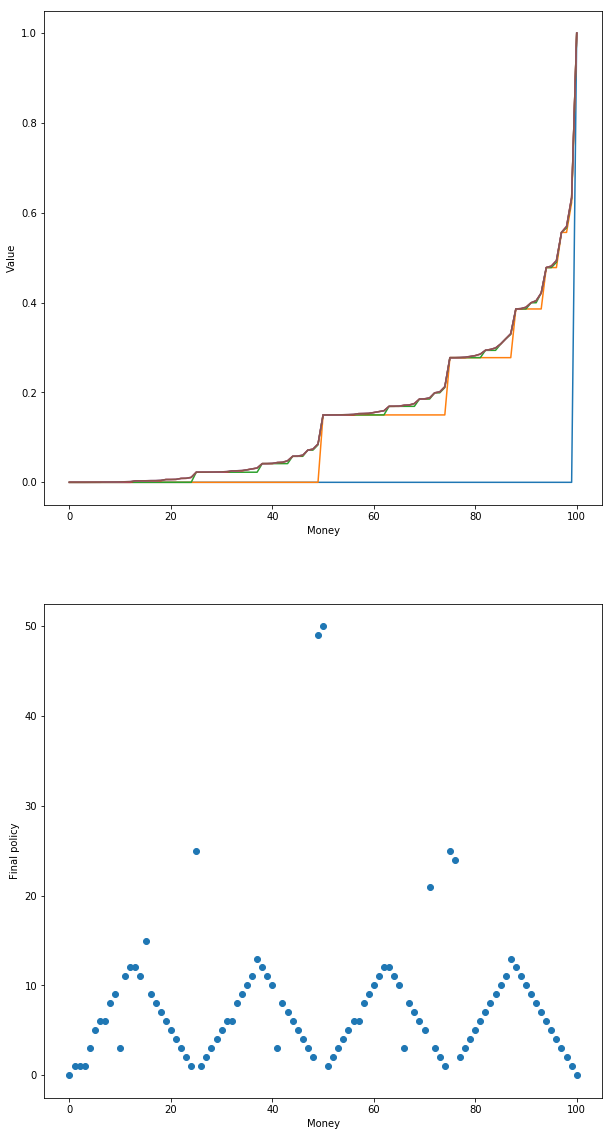

In [10]:
gg = GG(0.15)
gg.value_iteration()

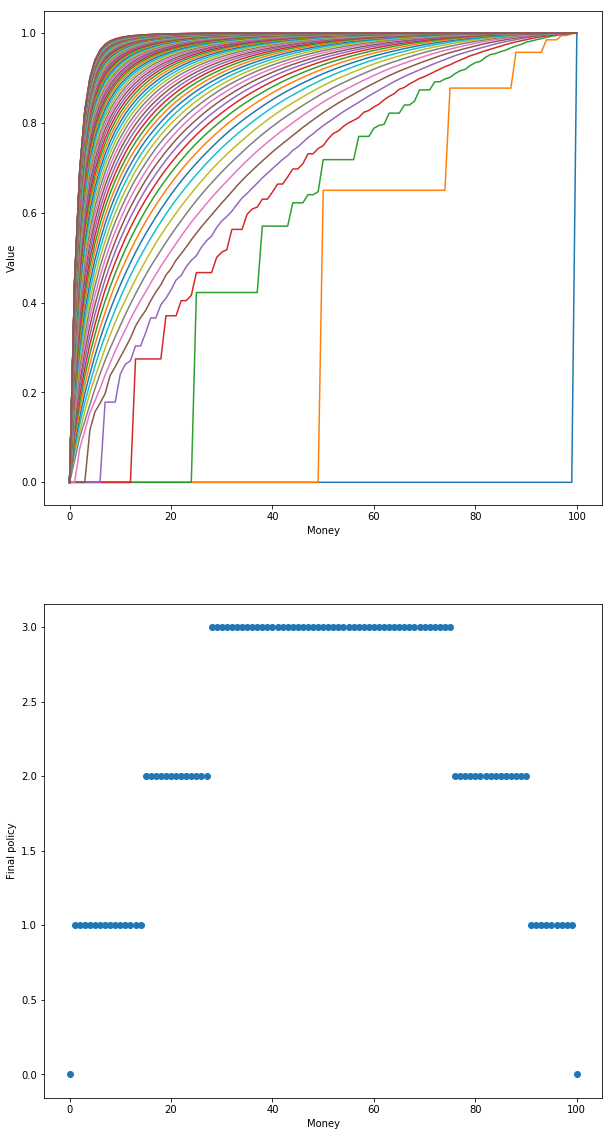

In [11]:
gg = GG(0.65)
gg.value_iteration()

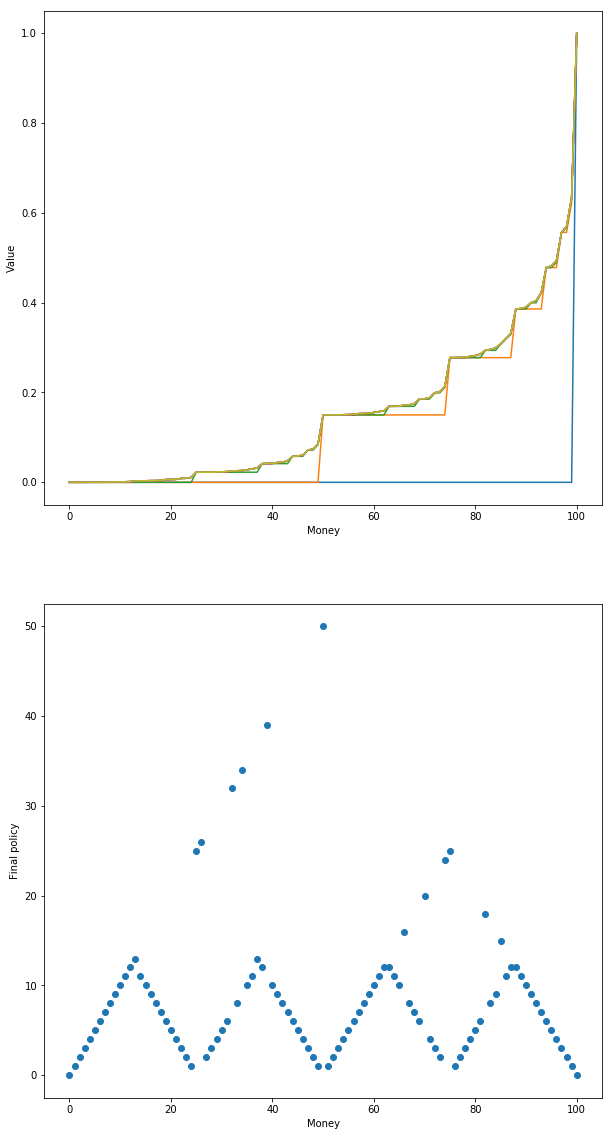

In [12]:
gg = GG(0.15, theta=1e-6)
gg.value_iteration()

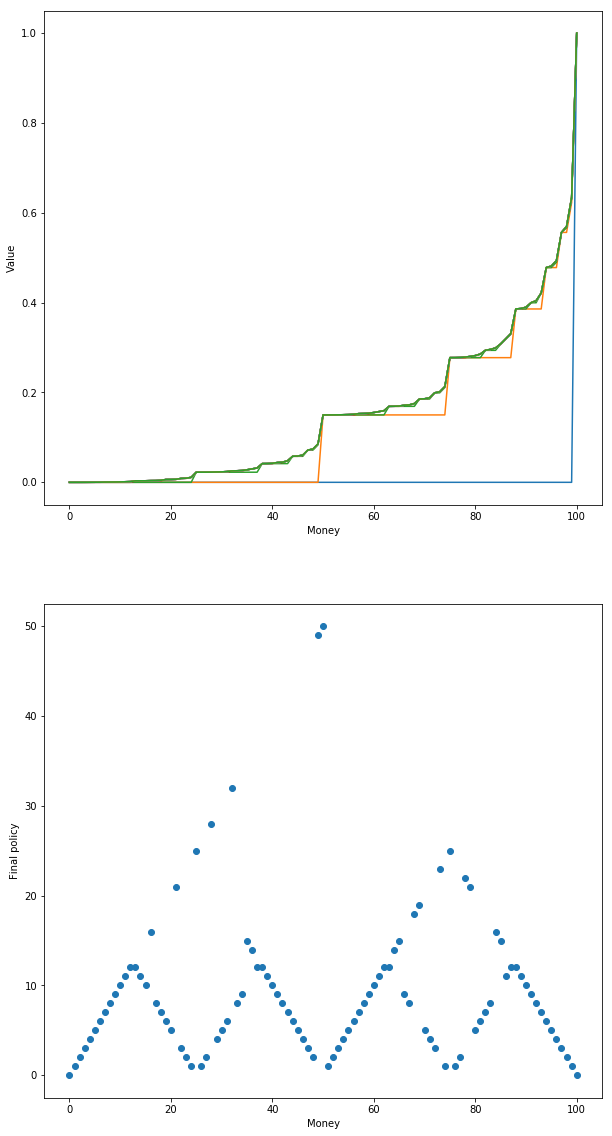

In [13]:
gg = GG(0.15, theta=1e-9)
gg.value_iteration()

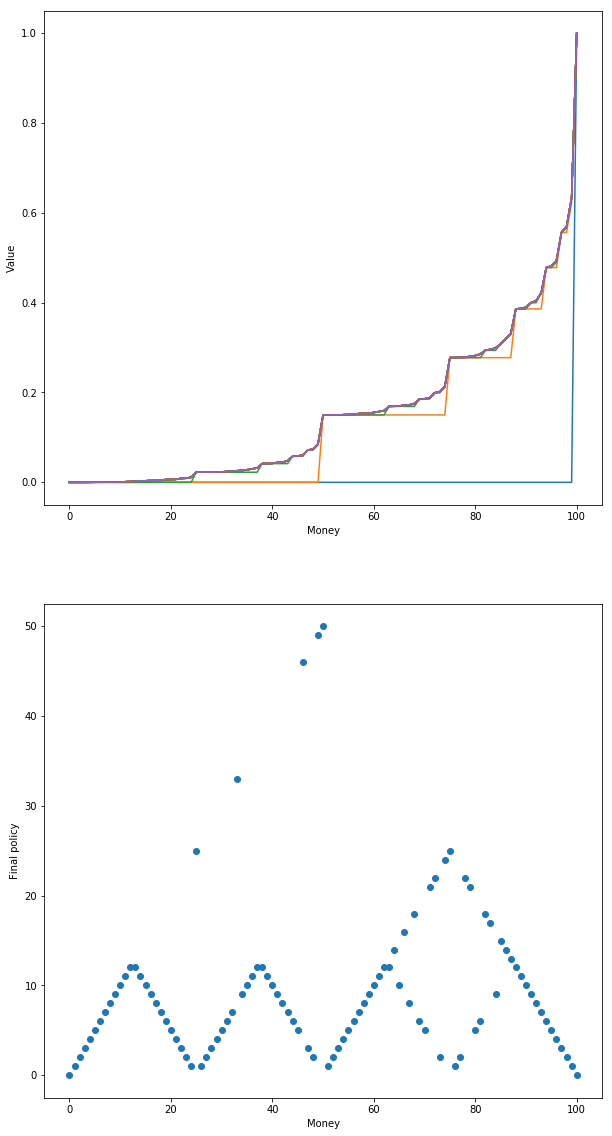

In [14]:
gg = GG(0.15, theta=1e-30)
gg.value_iteration()

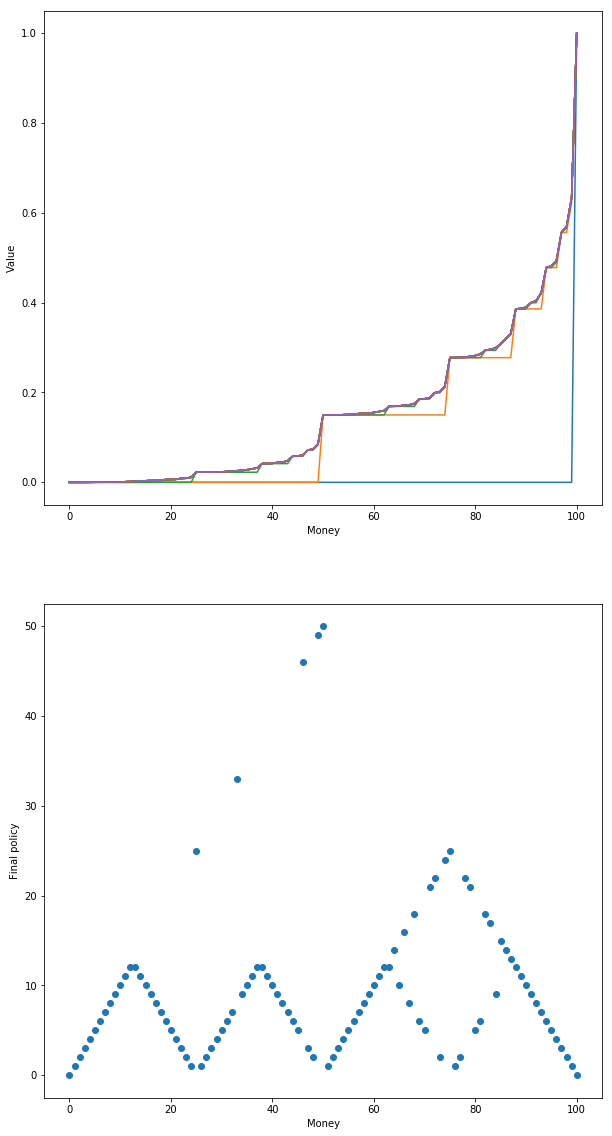

In [15]:
gg = GG(0.15, theta=1e-40)
gg.value_iteration()

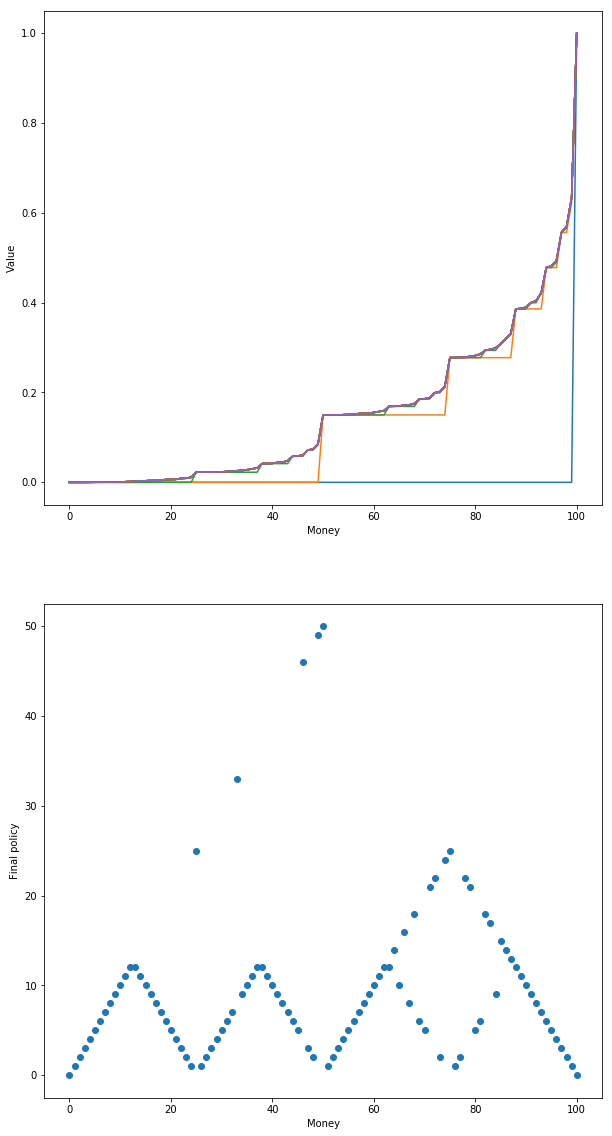

In [16]:
gg = GG(0.15, theta=1e-50)
gg.value_iteration()

In [17]:
# Doesn't converge
# gg = GG(0.15, theta=0)
# gg.value_iteration()

------------------------------------------------------------------
Stability
------------------------------------------------------------------
- The value iteration doesn't converges for theta = 0 i.e. The change in values of states is never 0.
- Thus the results are not stable.
- Policy on the other hand is stable because the variations in the state values aren't high enough to cause change in policy. (As can be seen when we do VIA for 1e-6, 1e-9, 1e-30 , 1e-40 and 1e-50 in the last 3 the policy doesn't change at all)